In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mutual_info_score

In [2]:
df = pd.read_csv('data/train.csv')

In [3]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [4]:
cat = [x for x in df.columns if df[x].dtypes == 'object']
cat

['name', 'sex', 'ticket', 'cabin', 'embarked']

In [5]:
for c in cat:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [6]:
df['age'] = df['age'].fillna(df['age'].mean())

In [7]:
num = [x for x in df.columns if df[x].dtypes != 'object']
num

['passengerid', 'survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']

In [8]:
df.describe(exclude=[np.number])

,name,sex,ticket,cabin,embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"braund,_mr._owen_harris",male,347082,b96_b98,s
freq,1,577,7,4,644


In [9]:
df_num = df.copy()
df_num = df_num.drop(['name', 'sex', 'ticket', 'cabin', 'embarked'], axis=1)

In [10]:
df_num.corr()

,passengerid,survived,pclass,age,sibsp,parch,fare
passengerid,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
sibsp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


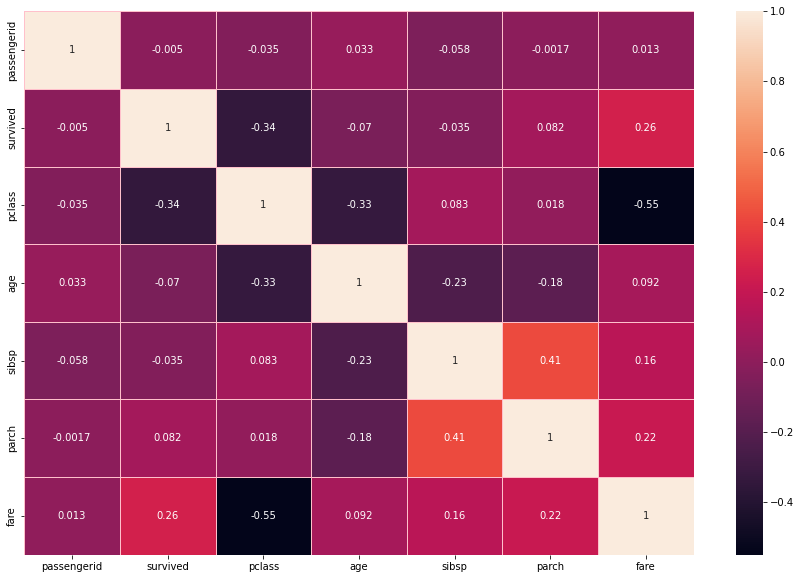

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(df_num.corr(), annot=True, linewidths=.5, linecolor="Pink")
plt.show()

In [12]:
df_num['family'] = df_num['sibsp'] + df_num['parch']
df_num['is_single'] = (df_num['family'] == 1).astype('int')
df_num = df_num.drop(['sibsp', 'parch'], axis = 1)

In [13]:
df_num['young'] = (df_num['age'] <= df_num['age'].mean())

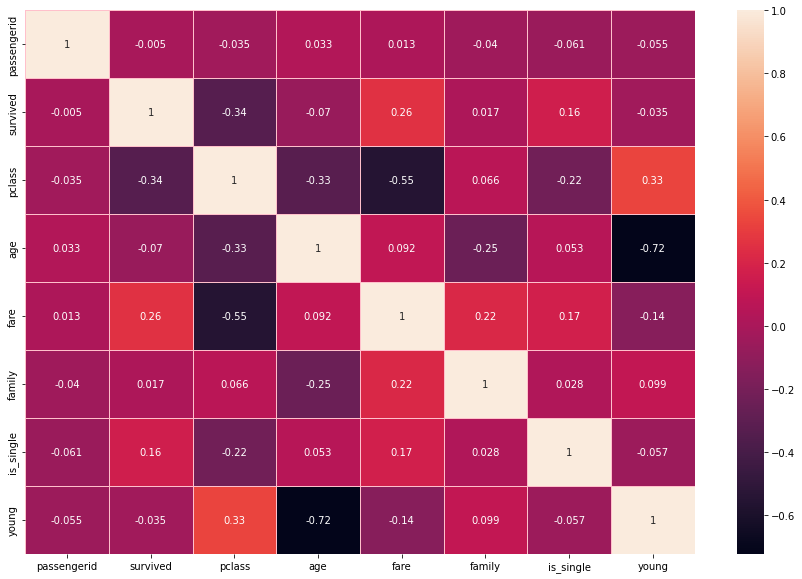

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(df_num.corr(), annot=True, linewidths=.5, linecolor="Pink")
plt.show()

In [15]:
df_num = df_num[['pclass', 'fare', 'is_single']]

In [16]:
df_cat = df.copy()
df_cat = df_cat.fillna('NULL')

In [17]:
def apply_mutual(data):
    return mutual_info_score(data, df_cat.survived)

In [18]:
df_mut = df_cat[cat].apply(apply_mutual)
df_mut = df_mut.sort_values(ascending=False).to_frame()
df_mut

,0
name,0.665912
ticket,0.572496
cabin,0.165236
sex,0.150870
embarked,0.016668


In [19]:
df_cat['female'] = (df_cat['sex'] == 'female').astype('int')
df_cat['male'] = (df_cat['sex'] == 'male').astype('int')

In [20]:
df_cat = df_cat.drop(['passengerid', 'survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'sex'], axis=1)

In [21]:
df_cat = df_cat.drop(['embarked'], axis=1)

In [22]:
df_cat = df_cat.drop(['name'], axis=1)

In [23]:
df_cat

,ticket,cabin,female,male
0,a/5_21171,NULL,0,1
1,pc_17599,c85,1,0
2,ston/o2._3101282,NULL,1,0
3,113803,c123,1,0
4,373450,NULL,0,1
...,...,...,...,...
886,211536,NULL,0,1
887,112053,b42,1,0
888,w./c._6607,NULL,1,0
889,111369,c148,0,1


In [24]:
df_full = df_cat.join(df_num)
df_full = df_full.drop(['ticket', 'cabin'], axis = 1)

In [25]:
df_full = df_full.join(df.survived)
df_full

,female,male,pclass,fare,is_single,survived
0,0,1,3,7.2500,1,0
1,1,0,1,71.2833,1,1
2,1,0,3,7.9250,0,1
3,1,0,1,53.1000,1,1
4,0,1,3,8.0500,0,0
...,...,...,...,...,...,...
886,0,1,2,13.0000,0,0
887,1,0,1,30.0000,0,1
888,1,0,3,23.4500,0,0
889,0,1,1,30.0000,0,1


In [26]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [27]:
df_train, df_val = train_test_split(df_full, test_size=0.25, random_state=2)

In [28]:
y_train = df_train.survived.values
y_val = df_val.survived.values

In [29]:
df_train = df_train.drop(['survived'], axis=1)
df_val = df_val.drop(['survived'], axis=1)

In [30]:
dict_m = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient='records')
X_train = dict_m.fit_transform(train_dict)
# train_dict

In [31]:
X_train

array([[ 13.    ,   1.    ,   0.    ,   0.    ,   2.    ],
       [  6.975 ,   0.    ,   0.    ,   1.    ,   3.    ],
       [  8.05  ,   0.    ,   0.    ,   1.    ,   3.    ],
       ...,
       [ 49.5042,   0.    ,   0.    ,   1.    ,   1.    ],
       [221.7792,   0.    ,   0.    ,   1.    ,   1.    ],
       [ 25.925 ,   0.    ,   0.    ,   1.    ,   1.    ]])

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
val_dict = df_val.to_dict(orient='records')
X_val = dict_m.transform(val_dict)
y_lineral = model.predict(X_val)

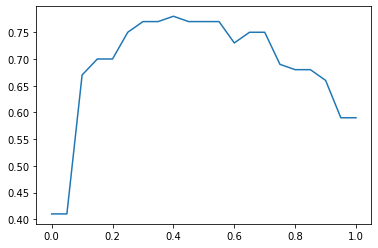

In [36]:
holds = np.linspace(0, 1, 21)
scores = []
for h in holds:
    score = (accuracy_score(y_val, y_lineral >= h)).round(2)
    scores.append(score)
#     print(h, score)

plt.plot(holds, scores)

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
model_log = LogisticRegression()
model_log.fit(X_train, y_train)

LogisticRegression()

In [45]:
y_log = model_log.predict_proba(X_val)[:,1]

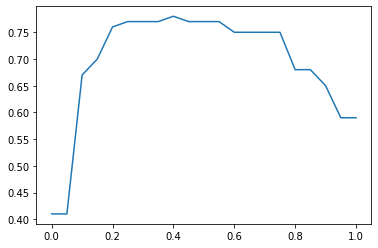

In [46]:
scores = []
for h in holds:
    score = (accuracy_score(y_val, y_log >= h)).round(2)
    scores.append(score)
#     print(h, score)

plt.plot(holds, scores)

In [47]:
df_test = pd.read_csv('data/test.csv')
df_test.columns = df_test.columns.str.lower().str.replace(' ', '_')
for c in cat:
    df_test[c] = df_test[c].str.lower().str.replace(' ', '_')
df_test['is_single'] = ((df_test['sibsp'] + df_test['parch']) == 0).astype('int')
df_test = df_test.drop(['passengerid', 'name', 'age', 'sibsp', 'parch', 'ticket', 'cabin', 'embarked'], axis=1)
df_test['fare'] = df_test['fare'].fillna(df_test.fare.mean())

In [48]:
dict_test = df_test.to_dict(orient='records')
X_test = dict_m.transform(dict_test)
X_test

array([[ 7.8292,  0.    ,  1.    ,  0.    ,  3.    ],
       [ 7.    ,  0.    ,  0.    ,  0.    ,  3.    ],
       [ 9.6875,  0.    ,  1.    ,  0.    ,  2.    ],
       ...,
       [ 7.25  ,  0.    ,  1.    ,  0.    ,  3.    ],
       [ 8.05  ,  0.    ,  1.    ,  0.    ,  3.    ],
       [22.3583,  0.    ,  0.    ,  0.    ,  3.    ]])

In [53]:
# y_pred = model.predict(X_test)
# y_test = (model_log.predict_proba(X_test)[:,1] >= 0.4).astype('int')
y_test = model_log.predict_proba(X_test)[:,1] 

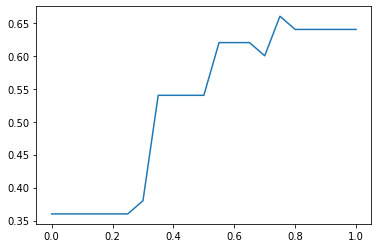

In [54]:
scores = []
for h in holds:
    score = (accuracy_score(y_predict_pass, y_test >= h)).round(2)
    scores.append(score)
#     print(h, score)

plt.plot(holds, scores)

In [51]:
predict_pass = pd.read_csv('data/gender_submission.csv')
y_predict_pass = predict_pass.Survived.values
pass_id = predict_pass.PassengerId.values

In [55]:
y_test = (model_log.predict_proba(X_test)[:,1] >= 0.4).astype('int')

In [56]:
import csv

with open("data/my_pred_log.csv", mode="a") as w_file:
    writer = csv.writer(w_file, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL, lineterminator='\n')
    writer.writerow(['PassengerId', 'Survived'])
    for i in range(len(y_test)):    
        writer.writerow([pass_id[i], y_test[i]])